In [1]:
# Fonots

# Ez a kis fostalicska csak arra kell, hogy belenézzek a metric_log-ba

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import warnings 
# warnings.filterwarnings("ignore")

from datetime import datetime, date, time
from pandas.plotting import scatter_matrix

import time
ost = time.time()

ost = time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())
print(ost)

ost = time.strftime("%H:%M:%S", time.gmtime())
print(ost)

2023-05-29 20:08:15
20:08:15


In [2]:
metric_file_name = 'metric_train_by_none.log'

df = pd.read_csv(metric_file_name, sep=',', header=0)

df.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs
0,192.168.0.6,19:47:32,19:47:3,2641.21845,2117.649435,1,15.4,78.0,19.4,80.5,...,216791.6,792795.2,0.0,618006.4,100.0,231.1,231.1,212.7,231.1,212.0
1,192.168.0.6,19:47:42,19:47:4,2418.02325,1654.059543,1,30.0,97.3,0.0,100.0,...,216439.6,820980.0,0.0,587587.2,100.0,320.5,320.5,301.2,320.0,299.2
2,192.168.0.6,19:47:51,19:47:5,1723.54025,755.782031,3,60.8,97.4,0.0,100.0,...,216460.8,825341.2,0.0,587241.6,100.0,290.7,290.7,275.7,290.7,275.3
3,192.168.0.6,19:48:01,19:48:0,1896.34140,1437.274937,1,36.3,98.7,0.0,100.0,...,216324.0,824530.0,0.0,587276.4,100.0,292.6,292.6,271.1,292.6,271.0
4,192.168.0.6,19:48:10,19:48:1,1341.00300,455.781556,3,79.3,97.4,0.0,100.0,...,216106.8,828933.6,0.0,563370.8,100.0,341.3,341.3,323.2,341.3,323.0


In [3]:
df['worker_give_metrics'].unique()

array(['192.168.0.6'], dtype=object)

In [4]:
pd.options.display.float_format = "{:,.2f}".format
df.describe().T

,count,mean,std,min,25%,50%,75%,max
response_time_p95,220.00,675.82,622.23,47.53,75.50,480.53,"1,407.07","2,641.22"
response_time,220.00,483.15,497.19,35.52,44.34,297.29,"1,018.65","2,117.65"
worker_number,220.00,4.03,2.54,1.00,2.00,4.00,6.00,8.00
request_rate,220.00,111.53,56.51,15.40,50.02,108.20,156.25,255.20
CPU0User%,220.00,90.04,11.55,55.80,82.67,97.20,97.70,98.90
CPU0Idle%,220.00,7.81,11.68,0.00,0.00,0.10,15.35,42.30
CPU0Total%,220.00,92.17,11.70,57.50,84.65,99.90,100.00,100.00
[DSK:sda]Reads,220.00,0.10,0.51,0.00,0.00,0.00,0.00,4.10
[DSK:sda]RMerge,220.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
[DSK:sda]RKBytes,220.00,2.80,15.48,0.00,0.00,0.00,0.00,142.50


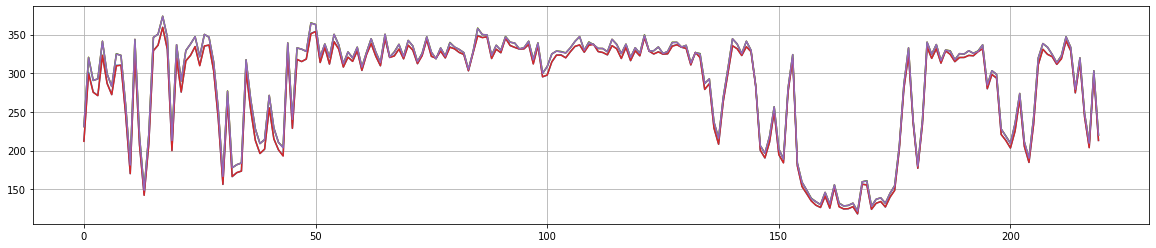

In [5]:
plt.figure(figsize=(20,4))
plt.plot(df['[TCPD]OutRequests'])
plt.plot(df['[TCPD]InDelivers'])
plt.plot(df['[TCPD]InReceives'])
plt.plot(df['[TCPD]OutSegs'])
plt.plot(df['[TCPD]InSegs'])
plt.grid()
plt.show()

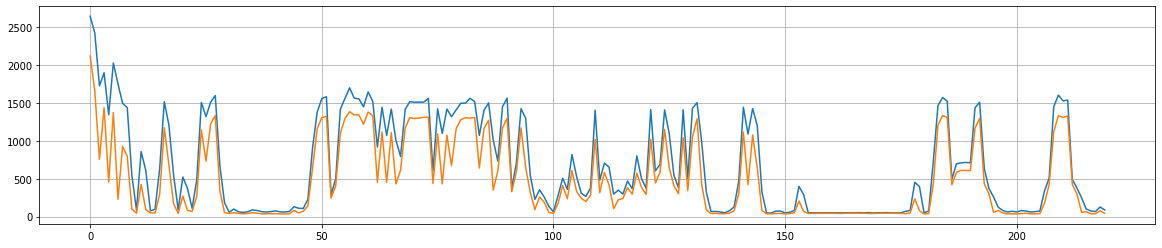

In [6]:
plt.figure(figsize=(20,4))
plt.plot(df['response_time_p95'])
plt.plot(df['response_time'])
plt.grid()
# plt.grid(axis='y')
plt.show()

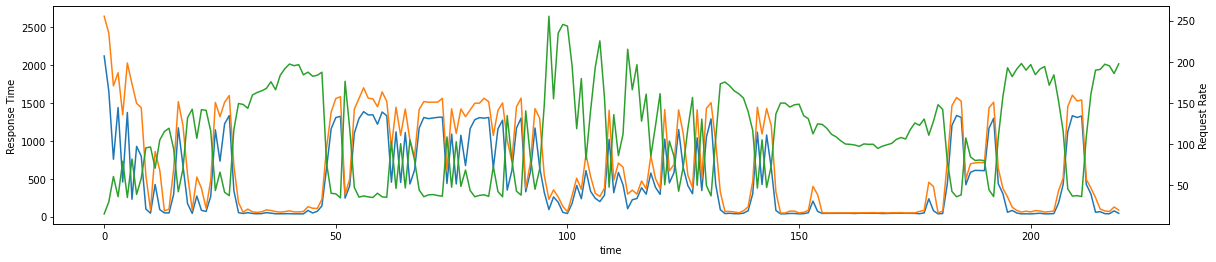

In [7]:
fig, ax1 = plt.subplots(figsize=(20, 4))

ax1.plot(df['response_time'], label = 'RT', color = 'C0')
ax1.plot(df['response_time_p95'], label = 'RT95%', color = 'C1')

ax2 = ax1.twinx()

ax2.plot(df['request_rate'], label = 'RR', color = 'C2')

ax1.set_xlabel('time')
ax1.set_ylabel('Response Time')
ax2.set_ylabel('Request Rate')

plt.show()

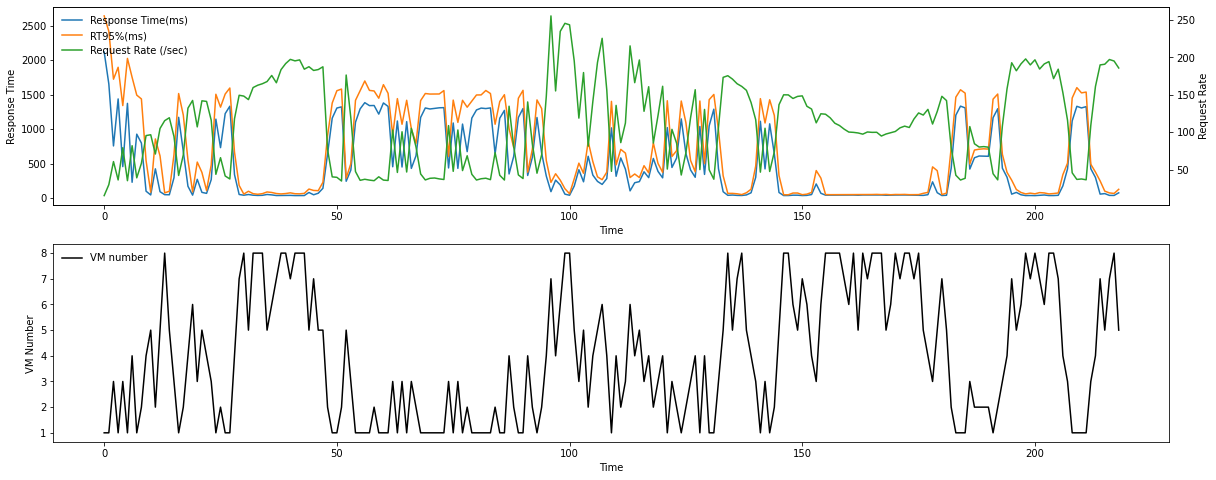

In [8]:
def show(FROM=0, TO=-1):

    fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(20, 8))

    l1 = ax1.plot(df['response_time'][FROM:TO], color = 'C0', label='Response Time(ms)')
    l2 = ax1.plot(df['response_time_p95'][FROM:TO], color = 'C1', label='RT95%(ms)')

    ax2 = ax1.twinx()

    l3 = ax2.plot(df['request_rate'][FROM:TO], color = 'C2', label='Request Rate (/sec)')

    ax1.set_xlabel('Time')
    ax1.set_ylabel('Response Time')
    ax2.set_ylabel('Request Rate')

    ax3.plot(df['worker_number'][FROM:TO], color = 'black', label='VM number')
    ax3.set_xlabel('Time')
    ax3.set_ylabel('VM Number')
    ax3.legend(loc=2, frameon=False)

    lns = l1+l2+l3
    labs = [l.get_label() for l in lns]
    ax2.legend(lns, labs, loc=2, frameon=False)

    plt.show()

show()

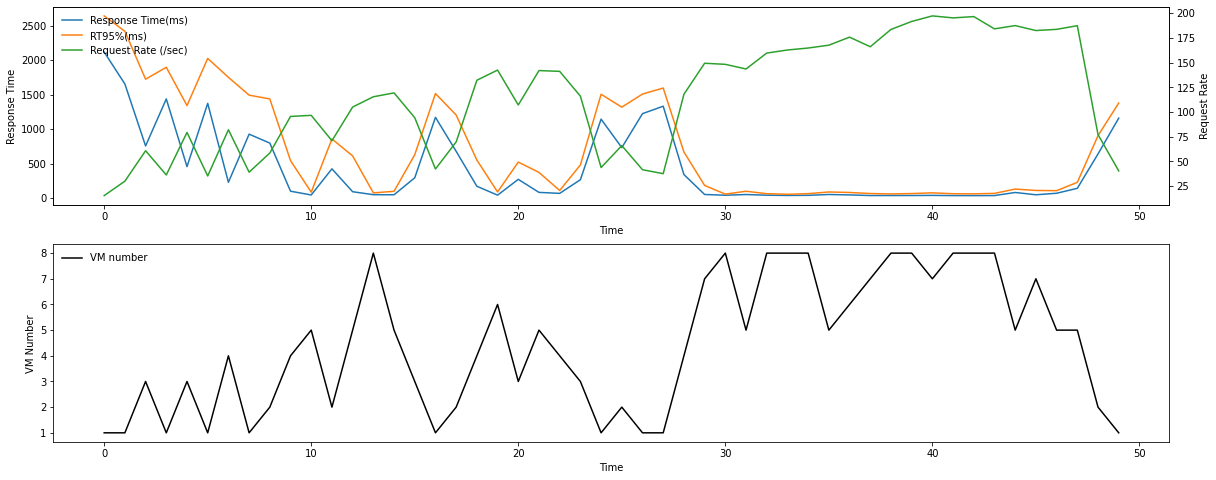

In [9]:
show(0, 50)

In [10]:
df.iloc[:, 0:7].describe()

,response_time_p95,response_time,worker_number,request_rate
count,220.00,220.00,220.00,220.00
mean,675.82,483.15,4.03,111.53
std,622.23,497.19,2.54,56.51
min,47.53,35.52,1.00,15.40
25%,75.50,44.34,2.00,50.02
50%,480.53,297.29,4.00,108.20
75%,"1,407.07","1,018.65",6.00,156.25
max,"2,641.22","2,117.65",8.00,255.20


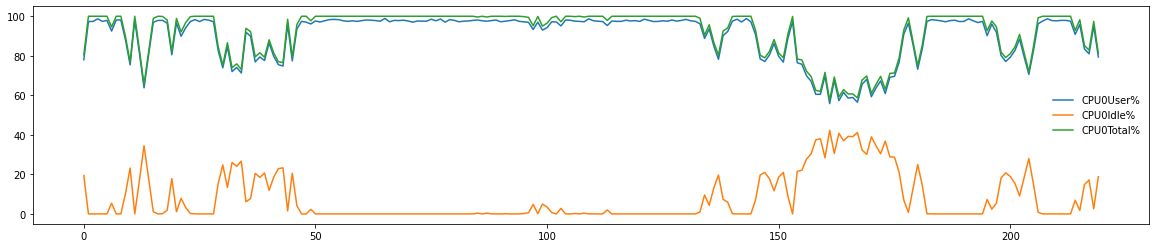

In [11]:
def plot_timeseries_metrics(name: str):

    plt.figure(figsize=(20, 4))

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.plot(df[col_name], label = col_name)

    plt.legend(frameon=False)
    plt.show()

plot_timeseries_metrics('CPU')

In [12]:
df.iloc[:, 7:10].describe()

,CPU0User%,CPU0Idle%,CPU0Total%
count,220.00,220.00,220.00
mean,90.04,7.81,92.17
std,11.55,11.68,11.70
min,55.80,0.00,57.50
25%,82.67,0.00,84.65
50%,97.20,0.10,99.90
75%,97.70,15.35,100.00
max,98.90,42.30,100.00


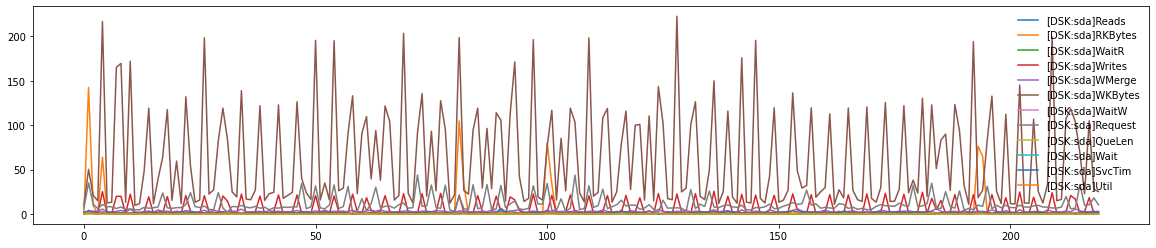

In [13]:
plot_timeseries_metrics('DSK')

In [14]:
df.iloc[:, 10:23].describe()

,[DSK:sda]Reads,[DSK:sda]RMerge,[DSK:sda]RKBytes,[DSK:sda]WaitR,[DSK:sda]Writes,[DSK:sda]WMerge,[DSK:sda]WKBytes,[DSK:sda]WaitW,[DSK:sda]Request,[DSK:sda]QueLen,[DSK:sda]Wait,[DSK:sda]SvcTim,[DSK:sda]Util
count,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00
mean,0.10,0.00,2.80,0.01,6.97,2.88,63.84,0.89,10.94,0.06,0.90,1.55,0.46
std,0.51,0.00,15.48,0.06,8.87,0.89,56.70,0.48,8.56,0.07,0.48,0.60,0.33
min,0.00,0.00,0.00,0.00,0.40,1.20,9.60,0.20,1.60,0.00,0.20,0.20,0.10
25%,0.00,0.00,0.00,0.00,0.70,2.30,17.60,0.70,6.40,0.00,0.70,1.20,0.30
50%,0.00,0.00,0.00,0.00,2.15,2.70,29.20,0.90,7.85,0.00,0.90,1.50,0.40
75%,0.00,0.00,0.00,0.00,18.30,3.20,110.80,1.00,10.43,0.10,1.00,1.80,0.50
max,4.10,0.00,142.50,0.40,25.60,6.20,222.80,5.80,43.90,0.30,5.80,6.20,2.50


In [15]:
df.iloc[:, 23:31].describe()

,[NUMA:0]Used,[NUMA:0]Free,[NUMA:0]Slab,[NUMA:0]Mapped,[NUMA:0]Anon,[NUMA:0]AnonH,[NUMA:0]Inactive,[NUMA:0]Hits
count,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00
mean,"1,944,908.38","90,459.62","125,722.90","216,003.03","842,042.88",0.00,"561,209.66",100.00
std,"5,797.93","5,797.93",798.53,583.40,"6,926.41",0.00,"7,438.17",0.00
min,"1,930,765.60","79,393.20","122,682.00","214,850.40","792,795.20",0.00,"550,018.00",100.00
25%,"1,940,348.50","85,825.60","125,450.30","215,568.00","836,191.80",0.00,"557,172.50",100.00
50%,"1,945,634.60","89,733.40","125,812.60","216,111.40","846,312.80",0.00,"560,910.80",100.00
75%,"1,949,542.40","95,019.50","126,252.80","216,462.60","846,987.10",0.00,"564,519.90",100.00
max,"1,955,974.80","104,602.40","127,299.20","216,991.60","847,974.00",0.00,"618,006.40",100.00


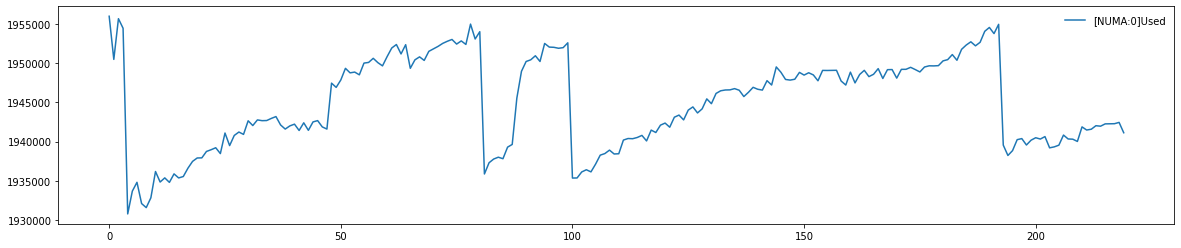

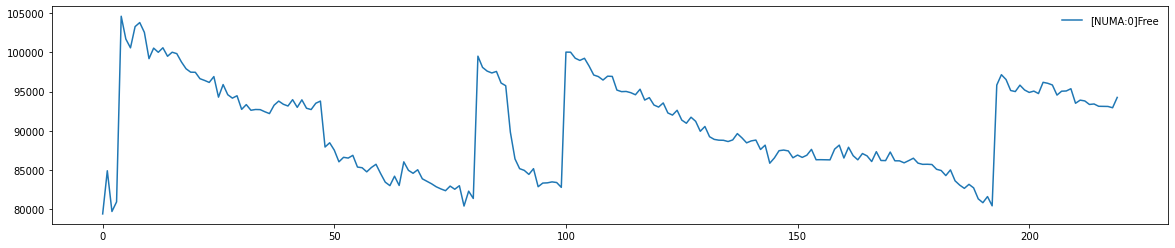

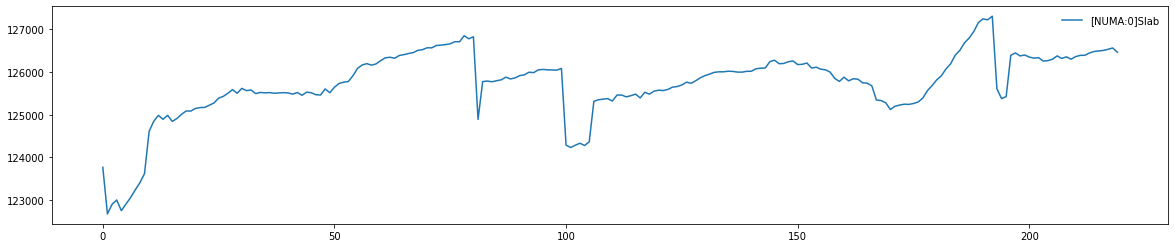

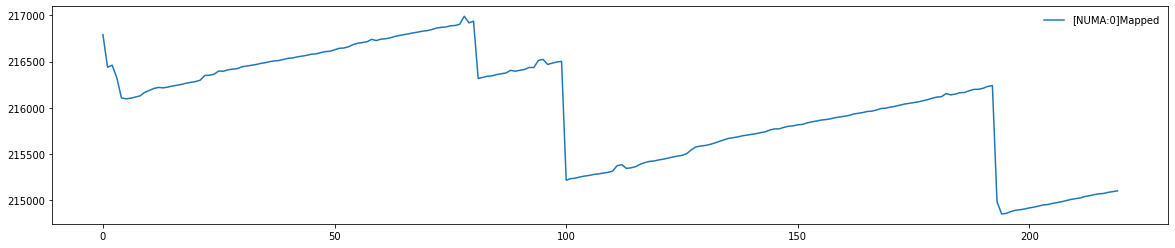

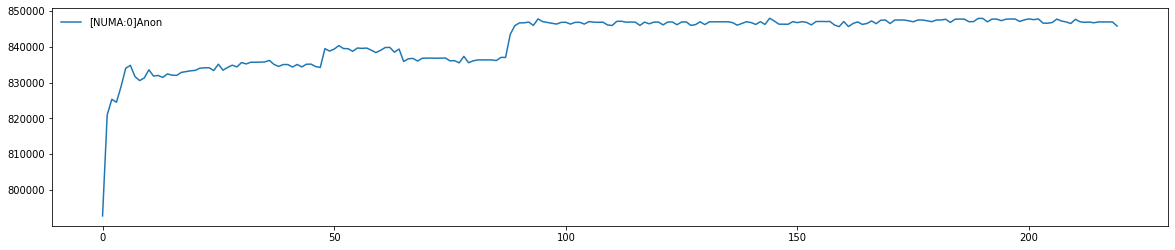

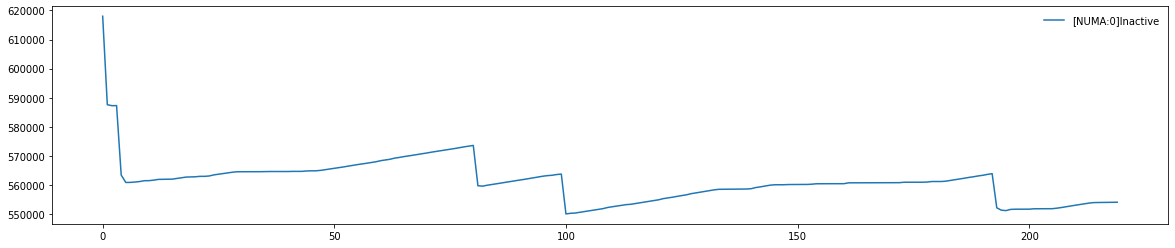

In [16]:
def plot_timeseries_metrics_separate(name: str):

    for col_name in df.columns:
        if name in col_name:
            if df[col_name].describe()[2] > 0:
                plt.figure(figsize=(20, 4))
                plt.ticklabel_format(useOffset=False)
                plt.ticklabel_format(style='plain')
                plt.plot(df[col_name], label = col_name)
                plt.legend(frameon=False)
                plt.show()

plot_timeseries_metrics_separate('NUMA')

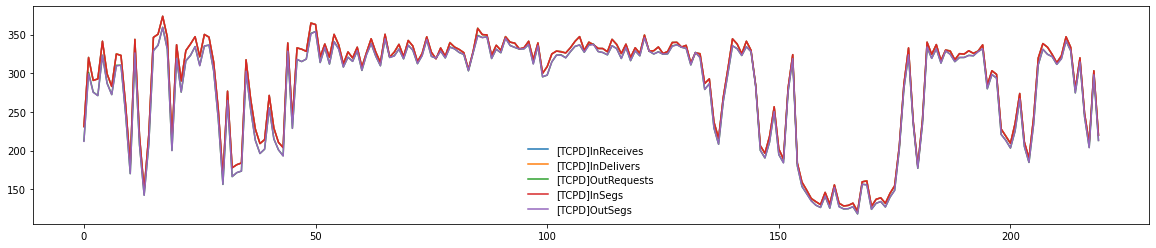

In [17]:
plot_timeseries_metrics('TCP')

## Before metric After metric

Itt állítom elő a metrikából a before after értékeket

Ennek a prototípusát dolgoztam ki és ellenőriztem le itt.

In [18]:
mf = df.copy()

mf['actual_vm_number_is'] = mf['worker_number']
mf['actual_vm_number_was'] = mf['worker_number'].shift(1)
mf['actual_vm_number_will'] = mf['worker_number'].shift(-1)

mf['delta_vm'] = mf['actual_vm_number_will'] - mf['actual_vm_number_is']

mf.head()

,worker_give_metrics,write_to_csv_time,time,response_time_p95,response_time,worker_number,request_rate,CPU0User%,CPU0Idle%,CPU0Total%,...,[NUMA:0]Hits,[TCPD]InReceives,[TCPD]InDelivers,[TCPD]OutRequests,[TCPD]InSegs,[TCPD]OutSegs,actual_vm_number_is,actual_vm_number_was,actual_vm_number_will,delta_vm
0,192.168.0.6,19:47:32,19:47:3,"2,641.22","2,117.65",1,15.40,78.00,19.40,80.50,...,100.00,231.10,231.10,212.70,231.10,212.00,1,NaN,1.00,0.00
1,192.168.0.6,19:47:42,19:47:4,"2,418.02","1,654.06",1,30.00,97.30,0.00,100.00,...,100.00,320.50,320.50,301.20,320.00,299.20,1,1.00,3.00,2.00
2,192.168.0.6,19:47:51,19:47:5,"1,723.54",755.78,3,60.80,97.40,0.00,100.00,...,100.00,290.70,290.70,275.70,290.70,275.30,3,1.00,1.00,-2.00
3,192.168.0.6,19:48:01,19:48:0,"1,896.34","1,437.27",1,36.30,98.70,0.00,100.00,...,100.00,292.60,292.60,271.10,292.60,271.00,1,3.00,3.00,2.00
4,192.168.0.6,19:48:10,19:48:1,"1,341.00",455.78,3,79.30,97.40,0.00,100.00,...,100.00,341.30,341.30,323.20,341.30,323.00,3,1.00,1.00,-2.00


In [19]:
mf['delta_vm'].unique()

array([ 0.,  2., -2.,  3., -3.,  1., -1., nan])

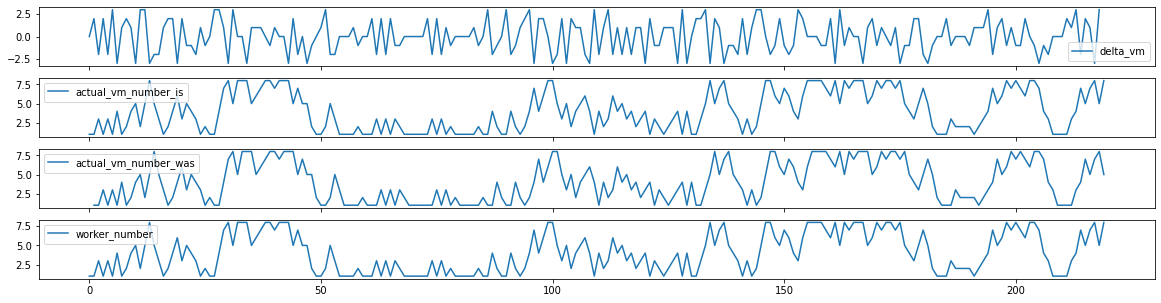

In [20]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['delta_vm'], label='delta_vm'); ax1.legend()
ax2.plot(mf['actual_vm_number_is'], label='actual_vm_number_is'); ax2.legend()
ax3.plot(mf['actual_vm_number_was'], label='actual_vm_number_was'); ax3.legend()
ax4.plot(mf['worker_number'], label='worker_number'); ax4.legend()
plt.show()

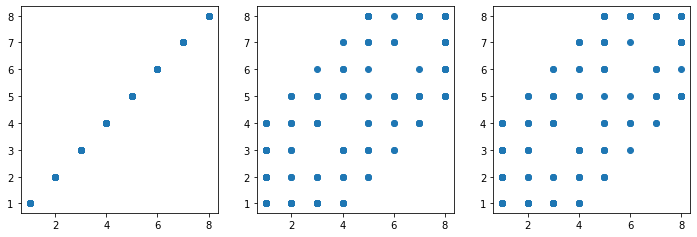

In [21]:
# Ellenőrzés (mert úgy tűnik, hogy a két adatbázisban az éppen aktuális VM szám mindhat egy kicsit mozogna)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(12, 3.8))
ax0.scatter(mf['worker_number'], mf['actual_vm_number_is'])
ax1.scatter(mf['worker_number'], mf['actual_vm_number_was'])
ax2.scatter(mf['worker_number'], mf['actual_vm_number_will'])
plt.show()

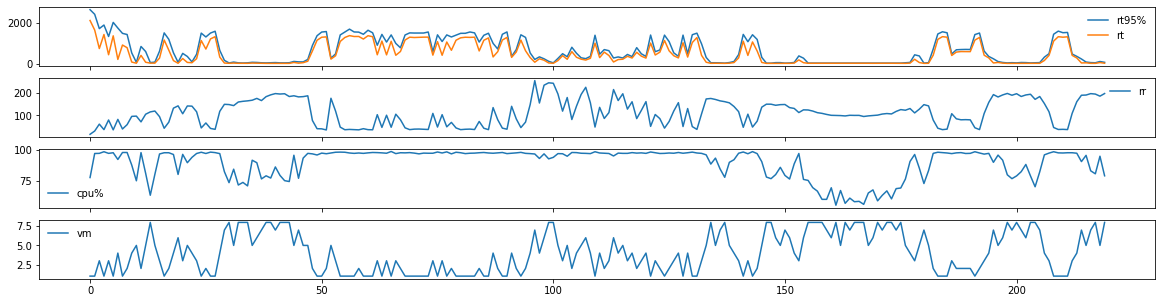

In [22]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(20, 5), sharex=True)

ax1.plot(mf['response_time_p95'], label='rt95%'); ax1.legend(frameon=False)
ax1.plot(mf['response_time'], label='rt');        ax1.legend(frameon=False)
ax2.plot(mf['request_rate'], label='rr');         ax2.legend(frameon=False)
ax3.plot(mf['CPU0User%'], label='cpu%');          ax3.legend(frameon=False)
ax4.plot(mf['worker_number'], label='vm');        ax4.legend(frameon=False)
plt.show()

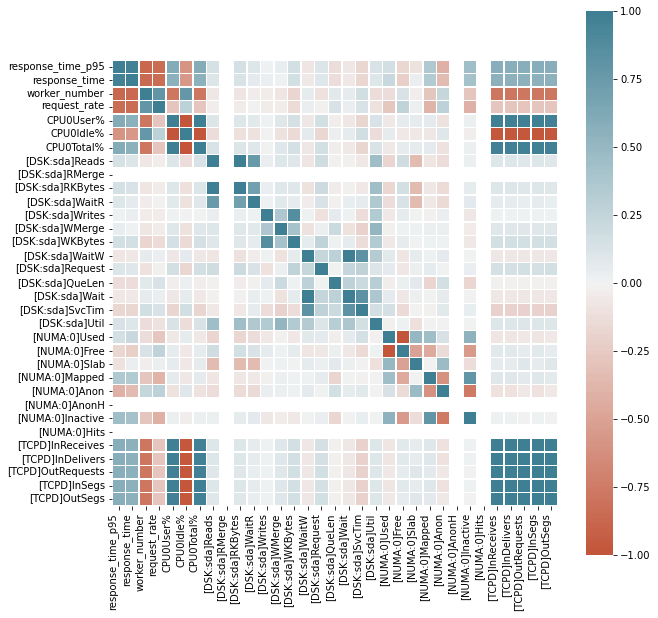

In [23]:
# Step 0 - Read the dataset, calculate column correlations and make a seaborn heatmap

corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot=False, linewidths=0.5, ax=ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);

In [24]:
input_variables = ['CPU0User%', 'CPU0Idle%', '[NUMA:0]Slab', '[NUMA:0]Mapped', '[NUMA:0]Anon', '[TCPD]InReceives', 'request_rate', 'response_time', 'worker_number']

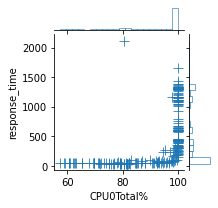

In [25]:
sns.jointplot(
    height=3.0,
    data=df, x='CPU0Total%', y='response_time',
    marker="+", s=100, marginal_kws=dict(bins=20, fill=False),
); plt.show()

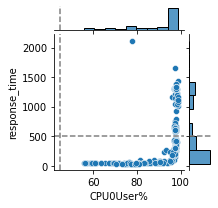

In [26]:
g = sns.JointGrid(data=df, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.scatterplot, sns.histplot)
g.refline(x=45, y=500); plt.show()

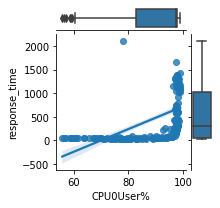

In [27]:
g = sns.JointGrid(data=df, x='CPU0User%', y='response_time', height=3.0)
g.plot(sns.regplot, sns.boxplot); plt.show()

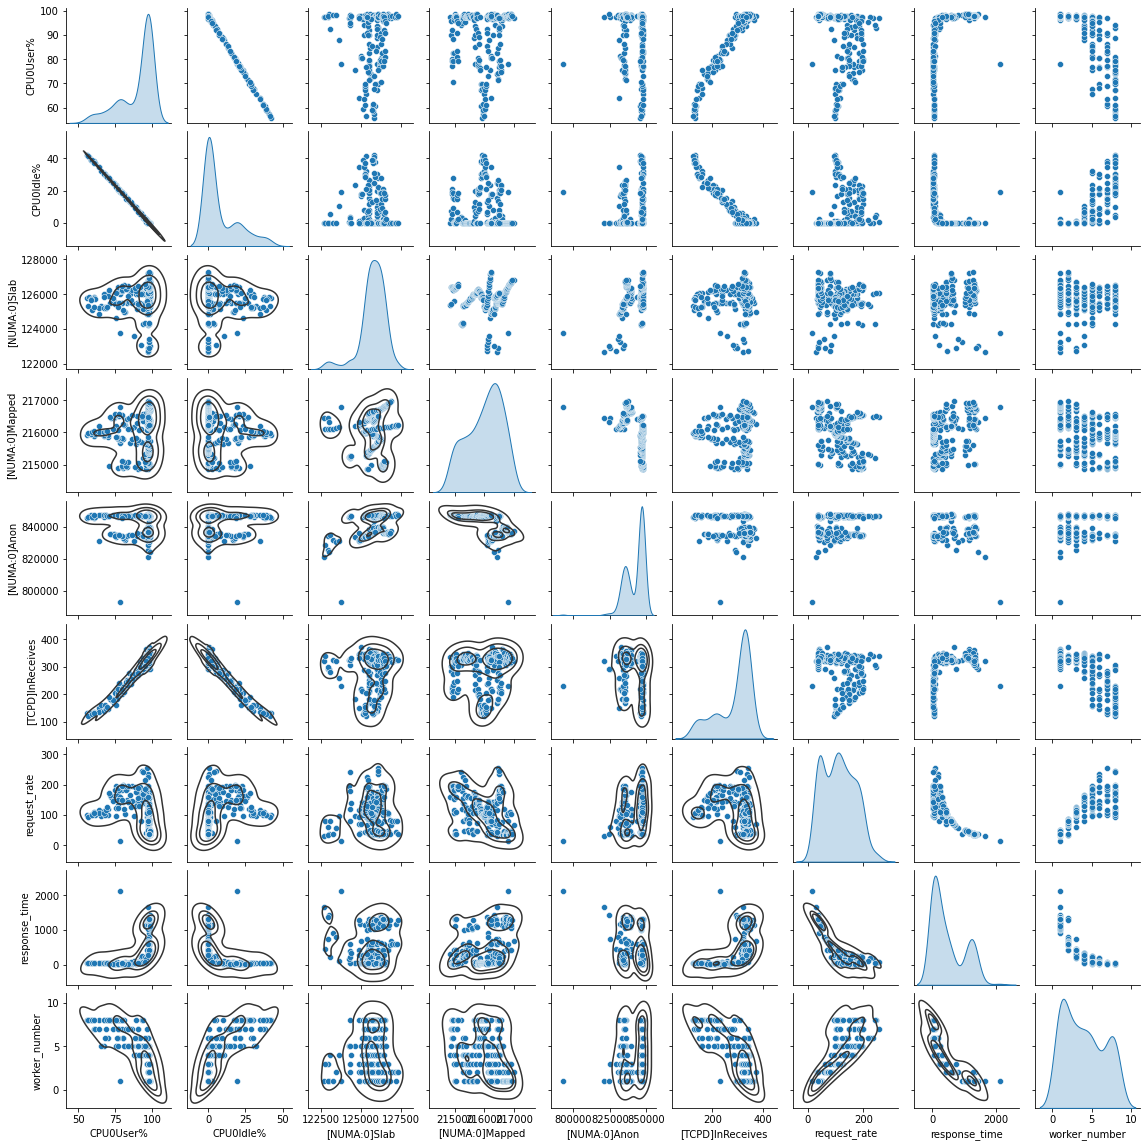

In [28]:
g = sns.pairplot(df[input_variables], diag_kind='kde', height=1.8)
g.map_lower(sns.kdeplot, levels=4, color='.2'); plt.show()

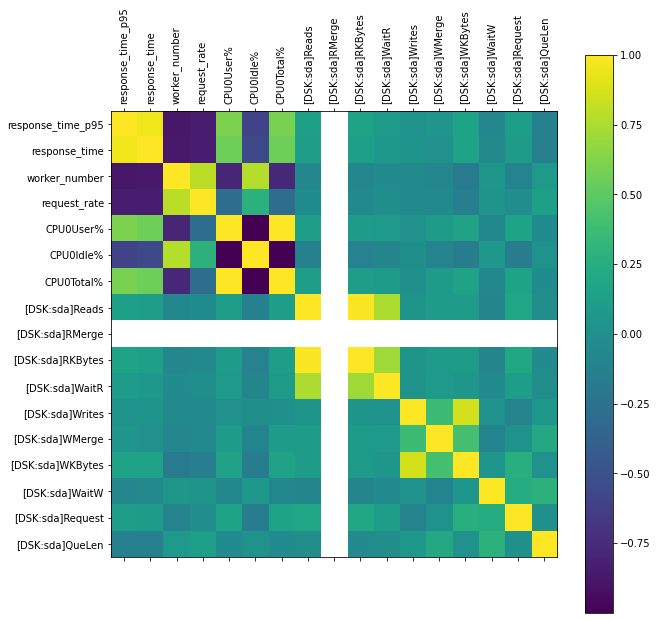

In [31]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
# plt.title('Correlation Matrix', fontsize=16);

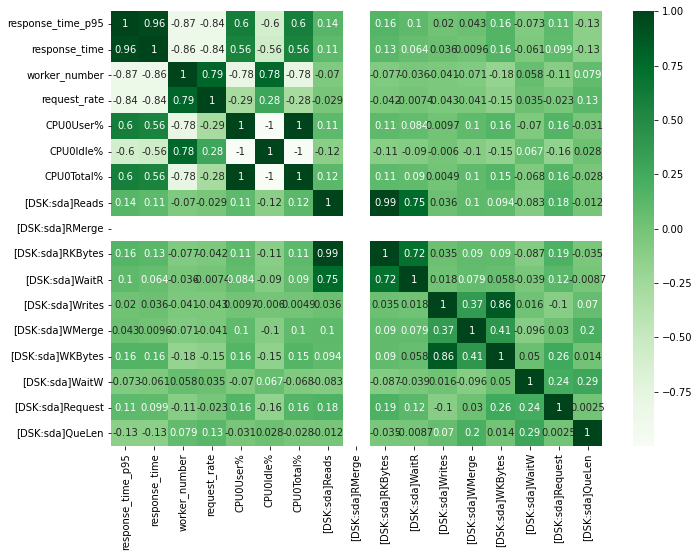

In [32]:
df = df.iloc[:, :20]
corr = df.corr()
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

In [34]:
df.isnull().values.any()

False

In [52]:
# kibaszni azokat az oszlopokat amelyek értéke konstans

for c in df.select_dtypes(exclude='object').columns:
    std = df[c].std()
    if std == 0:
        df.drop([c], axis=1, inplace=True)
        print(c)

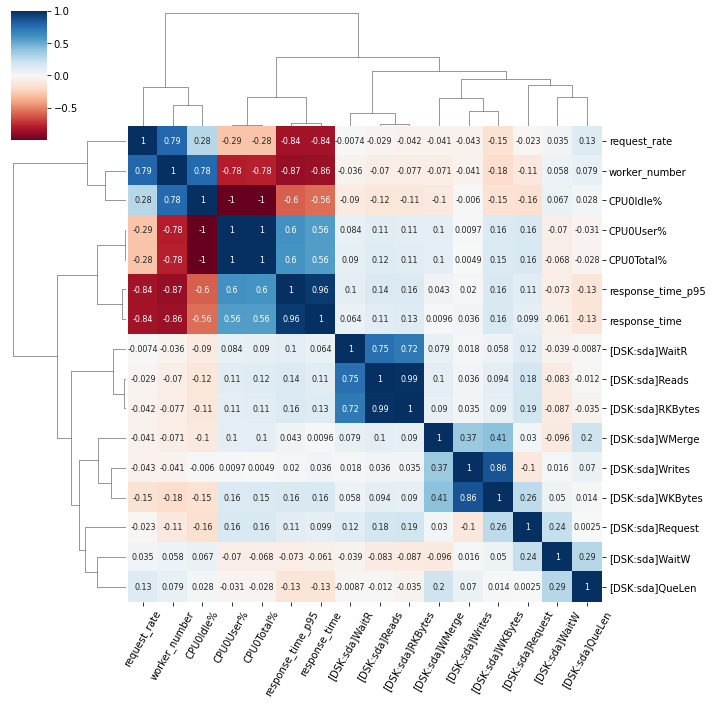

In [53]:
g = sns.clustermap(df.corr(),
                   method = 'complete',
                   cmap   = 'RdBu',
                   annot  = True,
                   annot_kws = {'size': 8})
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60);

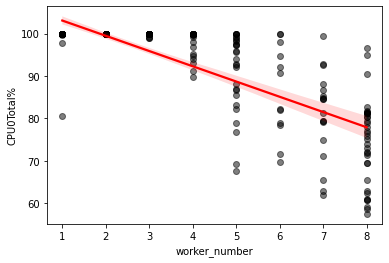

In [54]:
def scatter(x, y, color='black', alpha=0.5, lc='red', ci=95):
    sns.regplot(x=x,
                y=y,
                scatter_kws={
                    'color': color,
                    'alpha': alpha
                },
                line_kws={
                    'color': lc
                },
                ci=95)
    plt.show()

scatter(mf['worker_number'], mf['CPU0Total%'])

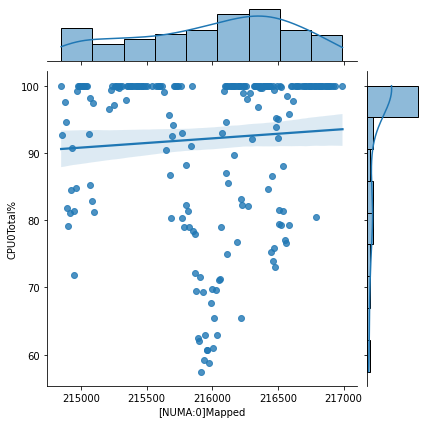

In [55]:
def join(x, y, data):
    sns.jointplot(x=x, y=y, data=data, kind='reg');

join('[NUMA:0]Mapped', 'CPU0Total%', mf)

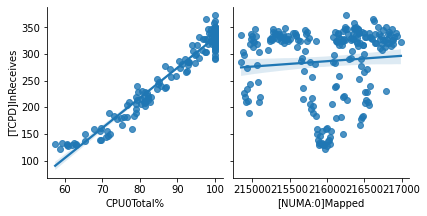

In [56]:
def pair(x_vars, y_vars, data):
    sns.pairplot(data, x_vars=x_vars, y_vars=y_vars,
             height=3, aspect=1.0, kind='reg');

pair(['CPU0Total%', '[NUMA:0]Mapped'], ['[TCPD]InReceives'], mf)

In [57]:

# Itt a vége fuss el véle


In [58]:
# Control the chaos